# Detecção de fraude bancária através do uso de cartão de crédito

## Autor
Nuno Ricardo Martins Cruz 


## Introdução

Devido á introdução do mundo digital podemos observar cada vêz mais, um crescimento de ações fraudulentas principalmente no que toca á utilização de cartões de creditos mais ligados á compra online principalmente. Desta forma em todo o sector financeiro os algoritmos de aprendizagem (*machine*learning*) são utilizados como forma de segurança, realizando uma detecção de transações fraudulentas. Neste notebook será demonstrado como estes mesmos algoritmos actuam no que toca á detecção de fraude. Através da utilização de um dataset que se encontra disponivel online, com cerca de 28.500 transações realizadas com cartões de credito conjugado com vários algoritmos de detecção de anomalias, será possivel encontrar e identificar transações com elevada probabilidade de fraude através do uso de cartão de crédito. Os algoritmos a serem implementados e testados serão:

 - Local Outlier Factor(LOF)
 - Logistic Regression
 - Isolation Forest Algorithm
 - Random Forest Classifier
 - Naive Baiye Classifier
 
Desta forma, iremos explorar algumas técnicas de análise de dados habitualmente utilizadas no que toca á ciência de dados, como gráficos matrizes de correlação, desta forma é possivel obter uma melhor compreensão da distribuição dos dados que representam o nosso dataset e que será analisado.

## 1. Imports das bibliotécas necessárias e devidas versões

Célula a baixo irá indicar-nos quais as versões das bibliotecas necessárias para a boa utilização destes mesmos algoritmos, desta forma temos uma forma de confirmar que as bibliotecas a utilizar estão devidamente instaladas com as versões corretas.

In [28]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
import pylab
#import imblearn
#import pandas as pdfrom pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import seaborn as sn


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
#from imblearn.over_sampling import ADASYN 
from matplotlib import gridspec

import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.4
Pandas: 0.24.2
Matplotlib: 3.1.0
Seaborn: 0.9.0
Scipy: 1.2.1
Sklearn: 0.21.2


In [29]:
# Import pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Set

De seguida os dados do nosso dataset a serem utilizados vão ser importados para o objecto "data" que será criado na célula seguinte. Este dataset é disponibilizado através de um ficheiro .csv como um DataFrame do Pandas. De seguida iremos observar que "tipo" de dados temos no nosso dataset para serem processados e analisados. Para tal, será utilizado descrição integrado do Pandas, bem como histogramas dos parametros do nosso dataset, bem como uma matriz de correlação.

In [30]:
# Import dataset utilizando o pandas .csv
data = pd.read_csv('creditcard.csv')

De forma a manter a confidencialidade e preservação de estratégias de mercado, os nomes das variáveis foram substituídas por "V1" até "V28" e representam o resultado de uma redução de dimensionalidade do PCA para proteger identidades de utilizadores e recursos confidenciais.
Podemos ainda observar que o dataset contém a variável "Class" que varia entre dois valores, 1 ou 0, onde 1 é definido como transação fraudulenta, a variável "Time" que representa a distância de tempo entre a transação corrente e a primeira transação realizada no dataset e por fim "Amount" que indica a quantidade transferida.

In [31]:
# Print da forma dos dados do dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [32]:
# Print data structure
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 são os resultados de uma redução de dimensionalidade do PCA para proteger as identidades do utilizador 
# e os recursos confidenciais

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

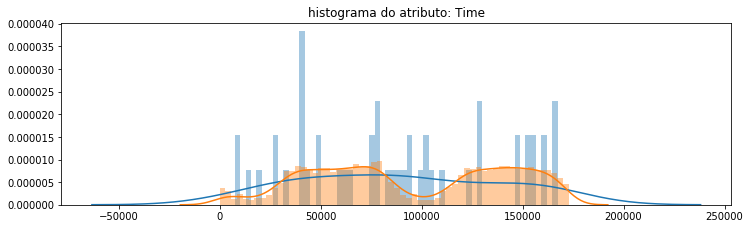

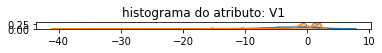

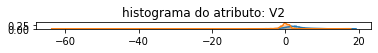

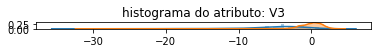

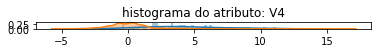

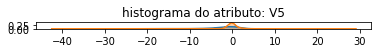

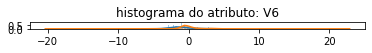

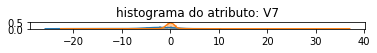

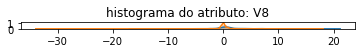

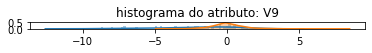

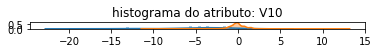

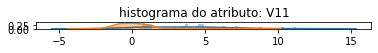

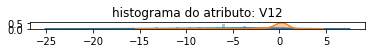

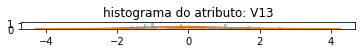

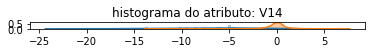

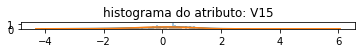

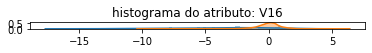

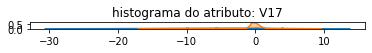

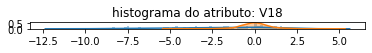

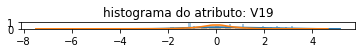

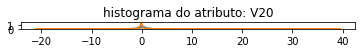

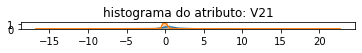

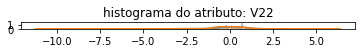

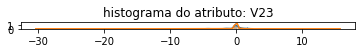

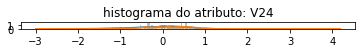

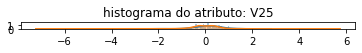

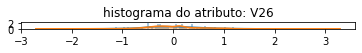

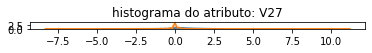

In [33]:
# Shape dos dados de fraude x não fraude
# Permite realizar uma comparação do shape dos dados para transações fraudulentas x não fraudulentas
# desta forma é possivel conhecer um pouco melhor o nosso dataset

variaveis = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, c in enumerate(data[variaveis]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=60)
 sns.distplot(data[c][data.Class == 0], bins=60)
 ax.set_xlabel('')
 ax.set_title('histograma do atributo: ' + str(c))
 plt.show()

In [34]:
# Determinar o número de casos de fraude no conjunto de dados
# Defenir e separar dados com as duas classificações possiveis
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

# métrica utilizada futuramente como parâmetro do modelo
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction) 

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


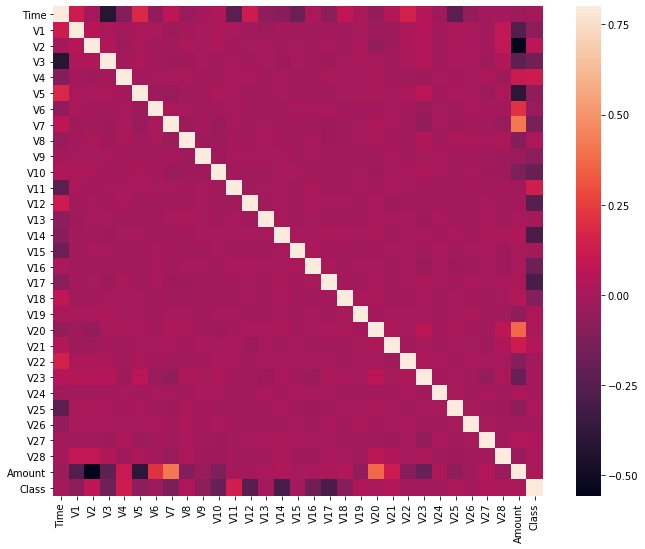

In [35]:
# Matriz de correlação
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

plt.show()

In [36]:
# Separar variável de classe das variáveis preditoras em dois novos conjuntos
# Obter todas as colunas do dataFrame
columns = data.columns.tolist()

# Filtrar as colunas para remover os dados desnecessários
columns = [c for c in columns if c not in ["Class"]]

# Armazenar a variável a ser prevista
target = "Class"

X = data[columns]
Y = data[target]

# Print formas
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


## 3. Deteção de Outlier

Após os dados do dataset terem sido processados e analisádos, podemos então implementar os algoritmos de aprendizagem não supervisionados utilizando as técnincas descritas a baixo:

### Isolation Forest Algorithm

A IsolationForest é um algoritmo que funciona com o princípio de isolar anomalias. Este seleciona aleatoriamente um atributo e de seguida, seleciona aleatoriamente um valor de divisão entre os valores máximo e mínimo do atributo selecionado. Existem dois tipos de particionamento. O recursivo e o aleatório
O particionamento recursivo é representado por uma estrutura em árvore, o número de divisões para isolar uma amostra é equivalente ao comprimento do caminho do nó raiz para o nó de terminação. 
O particionamento aleatório produz caminhos mais curtos para anomalias. Quando uma floresta de árvores aleatórias coletivamente produzir comprimentos de caminho mais curtos para amostras específicas, estes possuem uma grande probabilidade de serem anomalias.

### Local Outlier Factor (LOF)

O algoritmo fator outlier local baseia-se num conceito de densidade local, este examina os vizinhos de um determinado ponto para descobrir sua densidade e comparar com a densidade de outros pontos posteriormente
Ao comparar a densidade local de um ponto com as densidades locais de seus vizinhos, podem existir duas situações. Podemos ter pontos que possuírem uma densidade muito idêntica a dos vizinhos, e pontos que possuem uma densidade menor. Estes pontos são chamados de outliers. Esta densidade local é calculada pela distância típica em que um ponto pode ser "alcançado" por seus vizinhos
A "distância de acessibilidade" usada no LOF é uma medida adicional para produzir resultados mais estáveis dentro de clusters


In [37]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Definir estado aleatório
state = 1

# Definir ferramentas de detecção de outliers para comparação
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [38]:
# Ajustar modelo
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # Ajustar os dados e identificar outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reformular os valores de previsão para 0 como transação válida, 1 como fraude. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Executar as métricas de classificação
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>

# 4. Separação dos dados em conjuntos de treino e teste 

Foi utilizada uma separação de 80% (utilizada para treino do algoritmo) e de 20% (utilizada para teste do algoritmo) no que toca ao treino e teste dos três algoritmos, utilizando os dados de fontes já processados. A separação atribuida marioritariamente á parte do treino, permite um aumento no que toca á precisão do modelo, uma vez que vai ter um maior leque de amostras com o qual pode aprender.

- Random Forest Classifier
- Logisctic Regression
- Naive Baiye Classifier


In [49]:
# Separação dos dados 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(22784, 30)
(5697, 30)


# 4.1 Modelos de Treino

Modelos a serem implementados

In [50]:
# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

# 4.2 Análise dos modelos


In [51]:
# Análise dos modelos
modlist = [('RandomForest Classifier', RDF_Classifier)]

models = [j for j in modlist]

print()
print('=========================Model Evaluation Result=======================' "\n")
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print()
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Classification Report:" "\n", classification) 
    print()


=========================Model Evaluation Result=======================

===== RandomForest Classifier =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  100.0%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22742
           1       1.00      0.90      0.95        42

    accuracy                           1.00     22784
   macro avg       1.00      0.95      0.97     22784
weighted avg       1.00      1.00      1.00     22784




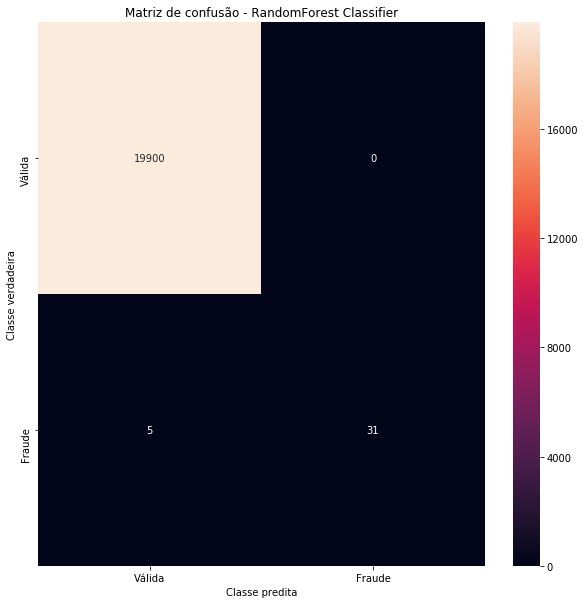

In [42]:
#Apresenta graficamente a matriz de confusão
# print('==== Random Forest Classifier ====')
LABELS = ['Válida', 'Fraude']
confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Matriz de confusão - RandomForest Classifier')
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe predita')

plt.show()

In [52]:
# Análise dos modelos
modlist = [('LogisticRegression', LGR_Classifier)]

models = [j for j in modlist]

print()
print('=========================Model Evaluation Result=======================' "\n")
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Classification Report:" "\n", classification) 
    print()


=========================Model Evaluation Result=======================

===== LogisticRegression =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22742
           1       0.78      0.60      0.68        42

    accuracy                           1.00     22784
   macro avg       0.89      0.80      0.84     22784
weighted avg       1.00      1.00      1.00     22784




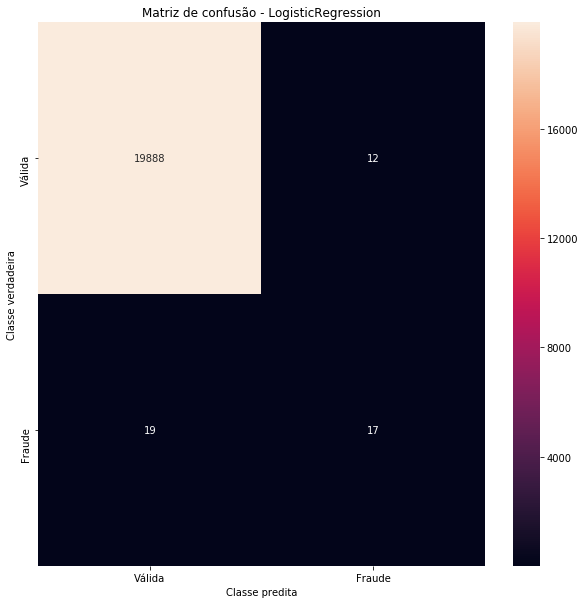

In [44]:
#Apresenta graficamente a matriz de confusão
# print('==== LogisticRegression ====')
LABELS = ['Válida', 'Fraude']
confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Matriz de confusão - LogisticRegression')
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe predita')

plt.show()

In [45]:
# Análise dos modelos
modlist = [('Naive Baiye Classifier', BNB_Classifier)]

models = [j for j in modlist]

print()
print('=========================Model Evaluation Result=======================' "\n")
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Classification Report:" "\n", classification) 
    print()


=========================Model Evaluation Result=======================

===== Naive Baiye Classifier =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19900
           1       0.76      0.61      0.68        36

    accuracy                           1.00     19936
   macro avg       0.88      0.81      0.84     19936
weighted avg       1.00      1.00      1.00     19936




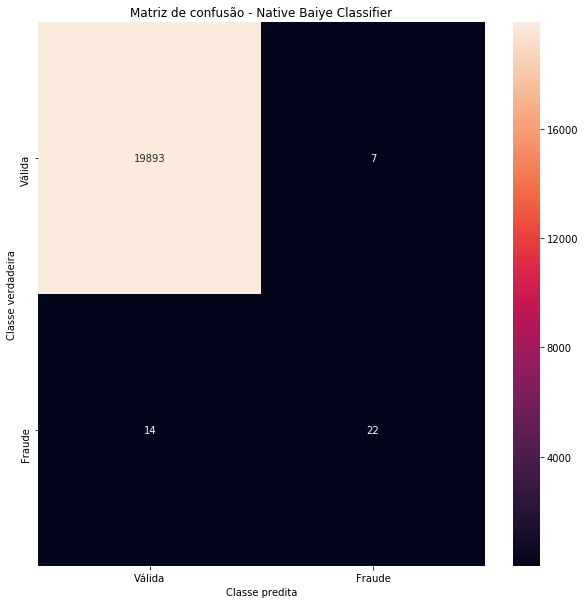

In [46]:
# Apresenta graficamente a matriz de confusão
# print('==== Native Baiye Classifier ====')
LABELS = ['Válida', 'Fraude']
confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Matriz de confusão - Native Baiye Classifier')
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe predita')

plt.show()

4.3 Modelos de Teste
-

In [48]:
# Modelos utilizados para teste
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    # pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[8530    2]
 [   5    8]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.80      0.62      0.70        13

    accuracy                           1.00      8545
   macro avg       0.90      0.81      0.85      8545
weighted avg       1.00      1.00      1.00      8545


=== LogisticRegression ===
Model Accuracy:  99.8%

Confusion Matrix:
 [[8526    6]
 [   7    6]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.50      0.46      0.48        13

    accuracy                           1.00      8545
   macro avg       0.75      0.73      0.74      8545
weighted avg       1.00      1.00      1.00      8545


=== Naive Baiye Clas